# Analisis a datos bancarios
Comenzamos con la importacion de las librerias para poder manejar los datos de forma correcta

In [47]:
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import numpy as np

## Obtencion de los datos
Procedemos a obtener los datos en un dataframe para el manejo adecuado de estos. Para su posterior limpieza y modificacion requerida

In [48]:
datos = pd.read_csv('../Datos/bank_customers.csv') # Se reciben los datos en un dataframe desde el archivo

datos.head(5)

,Customer ID,Name,Age,Gender,Address,Email,Phone Number,Account Type,Account Balance,Registration Date
0,24b6ef4a-6310-40de-b589-60d4b75f68e5,Mark Montgomery,47,Female,"52662 Olsen Keys Apt. 350\r\nNew Lauren, KS 90632",sanchezkyle@hotmail.com,190-175-3164x84539,Checking,9391.74,2024-03-19
1,a0ae8e10-73eb-4bfe-8187-5760c4a243e6,Jason King,84,Male,"13849 Romero Stream\r\nJacquelinechester, ND 3...",elewis@hotmail.com,001-985-792-0564,Checking,8395.59,2021-06-19
2,56c99350-9f0f-4cfc-8f8a-379b0c7848df,Steven Whitaker,86,Female,"3801 Brianna Ways\r\nThomasmouth, KY 06857",simmonschristopher@johnston.info,(245)011-5138,Savings,35086.30,2020-06-25
3,31398298-f9c6-40c2-8c56-9a9717c46b65,Terri Lucero,59,Male,026 Norman Villages Suite 475\r\nSouth Christo...,mbeltran@gmail.com,432.911.9239x197,Checking,93745.80,2024-05-17
4,282692f2-6693-4f4d-9beb-50239666f9fc,Jeremy Mason,25,Female,"9115 Lee Route Apt. 784\r\nSanchezmouth, DC 07910",carrie14@gmail.com,001-148-679-2508x961,Checking,3484.77,2021-05-29


# Limpieza y preparacion de los datos
Se preparan los datos cambiando tipos, verificando existencia de nulos y limpiando o modificando datos nulos de existir

In [49]:
datos.isna().sum() # verificacion de existencia de datos nulos

Customer ID          0
Name                 0
Age                  0
Gender               0
Address              0
Email                0
Phone Number         0
Account Type         0
Account Balance      0
Registration Date    0
dtype: int64

Verificamos que datos nulos no existen en los datos entregados, por lo que procedemos a verificar datos duplicados

In [50]:
datos.duplicated().sum() # Verificacion de filas duplicadas

np.int64(0)

Verificamos que no existen filas duplicadas. Por lo que continuamos con la modificacion de los tipos de datos.

In [51]:
datos.dtypes #Mostramos los tipos de datos para cada columna

Customer ID           object
Name                  object
Age                    int64
Gender                object
Address               object
Email                 object
Phone Number          object
Account Type          object
Account Balance      float64
Registration Date     object
dtype: object

Modificaremos los datos de las siguientes columnas:
- Name: object -> string
- Gender: object -> category
- Adress: object -> string
- Email: object -> string
- Phone Number: object -> string
- Account Type: object -> category
- Registration Date: object -> date

In [52]:
datos_modif = datos.copy()
datos_modif = (
    datos_modif.astype({
        'Name': 'string',
        'Gender': 'category',
        'Address': 'string',
        'Email': 'string',
        'Phone Number': 'string',
        'Account Type': 'category'
    })
)

datos_modif["Registration Date"] = pd.to_datetime(datos_modif["Registration Date"])

datos_modif.dtypes

Customer ID                  object
Name                 string[python]
Age                           int64
Gender                     category
Address              string[python]
Email                string[python]
Phone Number         string[python]
Account Type               category
Account Balance             float64
Registration Date    datetime64[ns]
dtype: object

In [53]:
datos_modif.head()

,Customer ID,Name,Age,Gender,Address,Email,Phone Number,Account Type,Account Balance,Registration Date
0,24b6ef4a-6310-40de-b589-60d4b75f68e5,Mark Montgomery,47,Female,"52662 Olsen Keys Apt. 350\r\nNew Lauren, KS 90632",sanchezkyle@hotmail.com,190-175-3164x84539,Checking,9391.74,2024-03-19
1,a0ae8e10-73eb-4bfe-8187-5760c4a243e6,Jason King,84,Male,"13849 Romero Stream\r\nJacquelinechester, ND 3...",elewis@hotmail.com,001-985-792-0564,Checking,8395.59,2021-06-19
2,56c99350-9f0f-4cfc-8f8a-379b0c7848df,Steven Whitaker,86,Female,"3801 Brianna Ways\r\nThomasmouth, KY 06857",simmonschristopher@johnston.info,(245)011-5138,Savings,35086.30,2020-06-25
3,31398298-f9c6-40c2-8c56-9a9717c46b65,Terri Lucero,59,Male,026 Norman Villages Suite 475\r\nSouth Christo...,mbeltran@gmail.com,432.911.9239x197,Checking,93745.80,2024-05-17
4,282692f2-6693-4f4d-9beb-50239666f9fc,Jeremy Mason,25,Female,"9115 Lee Route Apt. 784\r\nSanchezmouth, DC 07910",carrie14@gmail.com,001-148-679-2508x961,Checking,3484.77,2021-05-29


Ya limpios los datos podemos empezar a responder las diferentes preguntas

# ¿Cual es la distribución de Edad y Genero de los Clientes?

In [54]:
#Agrupamos por edad y Genero para contar las cantidades de coincidencias
datos_edad_genero = datos_modif.groupby(['Age', 'Gender']).size().reset_index(name='total')

# Se crean etiquetas para rangos a verificar
valores = ['18 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90+']
bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
datos_edad_genero["edad_bins"] = pd.cut(datos_edad_genero["Age"], bins=bins, labels=valores,
                                                       right=False)


C:\Users\Vicente\AppData\Local\Temp\ipykernel_31348\2656120961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_edad_genero = datos_modif.groupby(['Age', 'Gender']).size().reset_index(name='total')


[Text(0.5, 0, 'Rangos Edad'),
 Text(0, 0.5, 'Cant. Clientes'),
 Text(0.5, 1.0, 'Distribucion Edad y Genero de Clientes')]

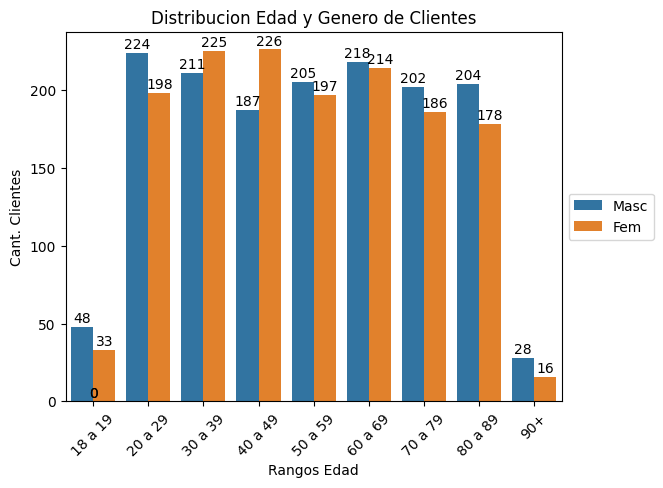

In [55]:
# Creacion del grafico
graf_distrib_edad_genero = sb.barplot(
    data=datos_edad_genero, x='edad_bins', y='total', 
    hue="Gender", hue_order=["Male", "Female"], estimator="sum",errorbar=None
)

#Mostrar los valores de cada barra en el grafico
for p in graf_distrib_edad_genero.patches:
    altura = p.get_height()
    graf_distrib_edad_genero.annotate(
        f'{int(altura)}',
        (p.get_x() + p.get_width() / 2, altura),
        ha='center', va='bottom',
        fontsize=10, color='black', xytext=(0,1),
        textcoords='offset points'
    )

# Modificar nombre de las leyendas
leyendas = graf_distrib_edad_genero.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
for texto, nombre in zip(leyendas.texts, ["Masc", "Fem"]):
    texto.set_text(nombre)

# modificar valores en el eje x
mpl.pyplot.xticks(rotation=45)
graf_distrib_edad_genero.set(xlabel="Rangos Edad", ylabel="Cant. Clientes", title="Distribucion Edad y Genero de Clientes")

Segun se puede interpretar, la mayoria de los clientes, ya sean hombres o mujeres, se encuentran entre la edades de 20 a 89, los datos minimos estan en los rangos 18 a 19 y 90+ para ambos casos.

Se puede verificar que la cantidad de clientes femeninos va en incremento desde los 18 a los 49, para luego descender un poco de los 49 a los 59, para luego incrementar hasta los 69, para terminar disminuyendo desde los 69 a mas de los 90.

En el caso de los clientes masculinos se ve un incrementeo explosivo entre los 18 a 29, luego disminuye sus de los 39 a 49, para luego incrementar nuevamente de los 49 a los 60 y decrecer de los 69 a mas de los 90.

# ¿Que rangos de edad predominan en para cada tipo de cuenta?

In [56]:
datos_modif["Account Type"].unique().tolist() # Obtenemos los tipos de cuentas en los datos

['Checking', 'Savings']

Con esto sabemos que tipo de cuentas poseemos en el conjunto de datos, para luego poder trabajar los datos de forma correcta.

In [96]:
#Agrupamos por edad y sumamos las cuentas segun los tipos 
datos_tipoCuenta_edad = datos_modif.groupby(['Age'])\
    .agg({
        'Account Type': [
            ('ahorro', lambda x : (x == "Savings").sum()),
            ('cheque', lambda x : (x == "Checking").sum())
        ]
    }).reset_index()

# Se crean etiquetas para rangos a verificar
valores = ['18 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90+']
bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 100]
datos_tipoCuenta_edad["rangos"] = pd.cut(datos_tipoCuenta_edad["Age"], bins=bins, labels=valores,
                                        right=False)

datos_tipoCuenta_edad = datos_tipoCuenta_edad.groupby('rangos')\
    .agg({
        ('Account Type', 'ahorro'): 'sum',
        ('Account Type', 'cheque'): 'sum'
    },
    {'total_cuentas': 'sum'}).reset_index()

datos_tipoCuenta_edad["total_cuentas"] = (datos_tipoCuenta_edad["Account Type"]["ahorro"] 
                                          + datos_tipoCuenta_edad["Account Type"]["cheque"])

datos_tipoCuenta_edad

C:\Users\Vicente\AppData\Local\Temp\ipykernel_31348\3509178001.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_tipoCuenta_edad = datos_tipoCuenta_edad.groupby('rangos')\


rangos Account Type        total_cuentas
                 ahorro cheque              
0  18 a 19           35     46            81
1  20 a 29          218    204           422
2  30 a 39          185    251           436
3  40 a 49          210    203           413
4  50 a 59          188    214           402
5  60 a 69          211    221           432
6  70 a 79          180    208           388
7  80 a 89          194    188           382
8      90+           24     20            44

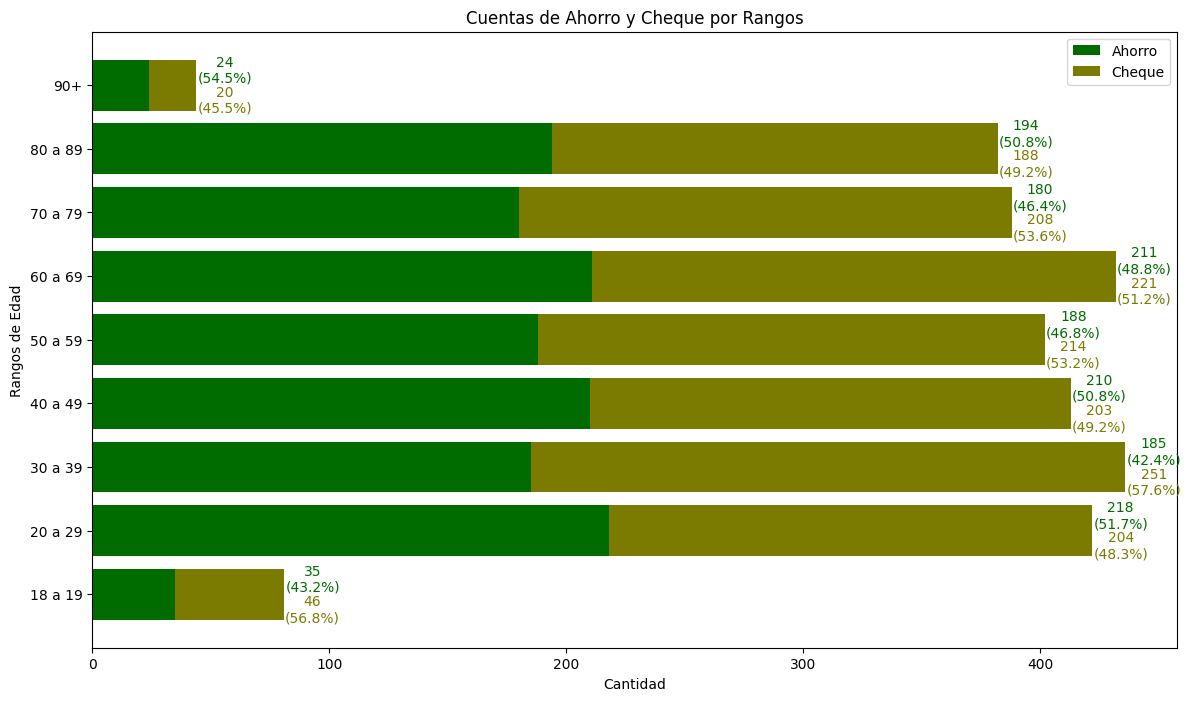

In [165]:
#Creamos el grafico de barras horizontal
# se ingresan los datos
rangos = datos_tipoCuenta_edad['rangos'].astype(str)  # eje y
ahorro = datos_tipoCuenta_edad[('Account Type', 'ahorro')] 
cheque = datos_tipoCuenta_edad[('Account Type', 'cheque')]

#Calculamos el total por rango
total = ahorro + cheque

#Calcular el porcentaje por rango
porc_ahorro = (ahorro / total) * 100
porc_cheque = (cheque / total) * 100

ahorro_vals = ahorro.values
cheque_vals = cheque.values

mpl.pyplot.figure(figsize=(14, 8))

# Posición en eje y
y_pos = np.arange(len(rangos))

# Se agregan las barras
mpl.pyplot.barh(y_pos, ahorro, label='Ahorro', color="#006C00")
mpl.pyplot.barh(y_pos, cheque, left=ahorro, label='Cheque', color="#7B7B01FF")  # se usa left para apilar las barras

mpl.pyplot.yticks(y_pos, rangos)
mpl.pyplot.ylabel('Rangos de Edad')
mpl.pyplot.xlabel('Cantidad')
mpl.pyplot.legend()
mpl.pyplot.title('Cuentas de Ahorro y Cheque por Rangos')

#Se agregan etiquetas de cantidad y porcentaje para ahorro
for i in range(len(rangos)):
    mpl.pyplot.text( ahorro[i]+cheque[i]+12, y_pos[i], f"{ahorro_vals[i]}\n({porc_ahorro.iloc[i]:.1f}%)", va='bottom', ha='center', 
                    color='#006C00')

#Etiquetas de barras cheque
for i in range(len(rangos)):
    mpl.pyplot.text(ahorro[i]+cheque[i]+12, y_pos[i], f"{cheque_vals[i]}\n({porc_cheque.iloc[i]:.1f}%)",va='top', ha='center', 
                    color="#7B7B01FF" )


mpl.pyplot.show()


Como se puede ver en el grafico, las predominancias segun rango etario serian las siguientes:
- 90+: Cuenta tipo Cheque con 54.5%
- 80 a 89: Cuenta tipo Ahorro con 50.8%
- 70 a 79: Cuenta tipo Cheque con 53.6%
- 60 a 69: Cuenta tipo Cheque con 51.2%
- 50 a 59: Cuenta tipo Cheque con 53.2%
- 40 a 49: Cuenta tipo Ahorro con 50.8%
- 30 a 39: Cuenta tipo Cheque con 57.6%
- 20 a 29: Cuenta tipo Ahorro con 51.7%
- 18 a 19: Cuenta tipo Cheque con 56.8%